# Assignment- Linear Regression
## Geely Auto Case Study
#### Problem Statement:

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

 

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

 - Which variables are significant in predicting the price of a car

- How well those variables describe the price of a car

Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market. 

**Business Goal** 

Required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market. 

## Reading and Understanding the Data

In [48]:
## Ignore Warings
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split


import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [49]:
# Load the the file
file = 'C:\\Users\\MTripathi\Desktop\\PGAIML\Geely Auto Assignment\\CarPrice_Assignment.csv'
cardf = pd.read_csv(file,encoding = "ISO-8859-1",low_memory=False)

In [50]:
cardf.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [51]:
cardf.shape

(205, 26)

In [52]:
cardf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [53]:
cardf.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [54]:
# What is the percentage of missing values for car df columns?

missing_val = round(100*cardf.isnull().sum()/cardf.shape[0],2)
missing_val.loc[missing_val > 0]

Series([], dtype: float64)

There are no missing values in data. Hence no need to drop/impute data

## Data Preparation and Cleaning

In [55]:
# Extract CompanyName from CarName which is needed for analysis
cardf['CompanyName'] = cardf['CarName'].apply(lambda x : x.split(' ')[0])

In [56]:
cardf.CompanyName.value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
volvo          11
peugeot        11
volkswagen      9
dodge           9
buick           8
bmw             8
plymouth        7
audi            7
saab            6
porsche         4
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
maxda           2
vw              2
renault         2
Nissan          1
toyouta         1
porcshce        1
vokswagen       1
mercury         1
Name: CompanyName, dtype: int64

In [57]:
# Convert all values in Company Name to lower case and check the data
cardf['CompanyName']=cardf['CompanyName'].apply(lambda x : x.lower())
cardf.CompanyName.value_counts()

toyota         31
nissan         18
mazda          15
honda          13
mitsubishi     13
subaru         12
volvo          11
peugeot        11
volkswagen      9
dodge           9
bmw             8
buick           8
plymouth        7
audi            7
saab            6
porsche         4
isuzu           4
alfa-romero     3
jaguar          3
chevrolet       3
vw              2
maxda           2
renault         2
toyouta         1
mercury         1
vokswagen       1
porcshce        1
Name: CompanyName, dtype: int64

In [58]:
# There are few spelling error in Company Names. Fix that
cardf['CompanyName'] = cardf.CompanyName.str.replace("vw","volkswagen",case = False)
cardf['CompanyName'] = cardf.CompanyName.str.replace("vokswagen","volkswagen",case = False)
cardf['CompanyName'] = cardf.CompanyName.str.replace("toyouta","toyota",case = False)
cardf['CompanyName'] = cardf.CompanyName.str.replace("porcshce","porsche",case = False)
cardf['CompanyName'] = cardf.CompanyName.str.replace("maxda","mazda",case = False)
cardf['CompanyName'] = cardf.CompanyName.str.replace("alfa-romero","alfa-romeo",case = False)

cardf.CompanyName.value_counts()

toyota        32
nissan        18
mazda         17
honda         13
mitsubishi    13
volkswagen    12
subaru        12
peugeot       11
volvo         11
dodge          9
bmw            8
buick          8
audi           7
plymouth       7
saab           6
porsche        5
isuzu          4
jaguar         3
alfa-romeo     3
chevrolet      3
renault        2
mercury        1
Name: CompanyName, dtype: int64

In [59]:
# Check all categorical variable for data descrepancies
#  fueltype , aspiration, doornumber, carbody,drivewheel,enginelocation, enginetype,cylindernumber, fuelsystem

cardf.fueltype.value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

In [60]:
cardf.aspiration.value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [61]:
cardf.doornumber.value_counts()

four    115
two      90
Name: doornumber, dtype: int64

In [62]:
cardf.carbody.value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

In [63]:
cardf.drivewheel.value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

In [64]:
cardf.enginelocation.value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

In [65]:
cardf.enginetype.value_counts()

ohc      148
ohcf      15
ohcv      13
l         12
dohc      12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

In [66]:
cardf.cylindernumber.value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64

In [67]:
cardf.fuelsystem.value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
spfi     1
mfi      1
Name: fuelsystem, dtype: int64

Other categorical variables looks fine as there is no data discrepancies.

## Visualising the Data

- Check the distribution of Price 
- Check Multicollinearity 
- Check some categorical variables and their relation with Price and their frequency distribution
- Check some continuous variables impact on Price and their frequency distribution 

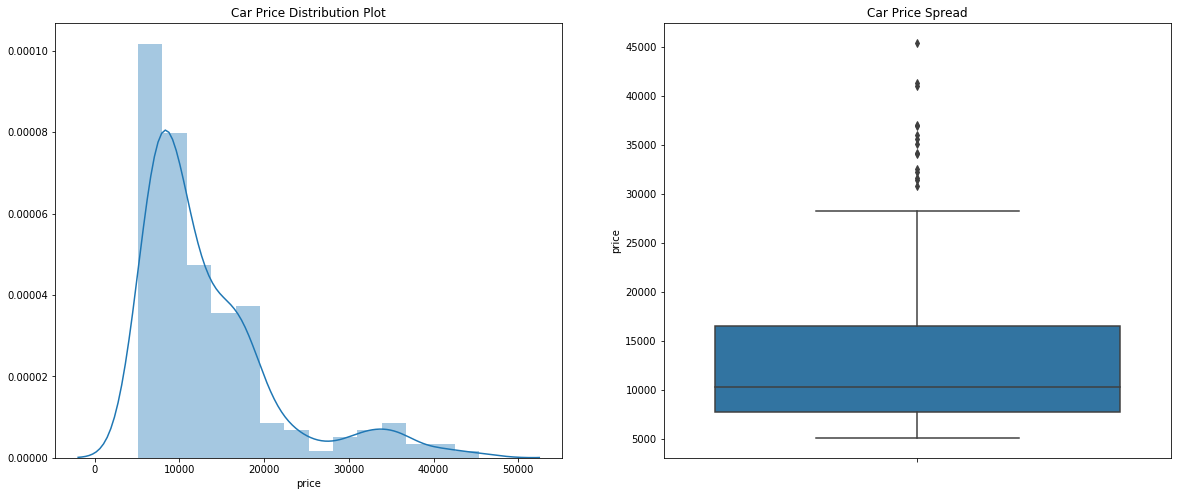

In [68]:
# Check the Target Variable "Price" Distribution
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(cardf.price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=cardf.price)

- Price Frequency plot is right skewed which shows most of sales is of cars priced below $15000
- There is a significant difference between the mean and the median of the price distribution.

### Visualising Categorical Variables
- CarName, fueltype , aspiration, doornumber, carbody,drivewheel,enginelocation, enginetype,cylindernumber, fuelsystem

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text xticklabel objects>)

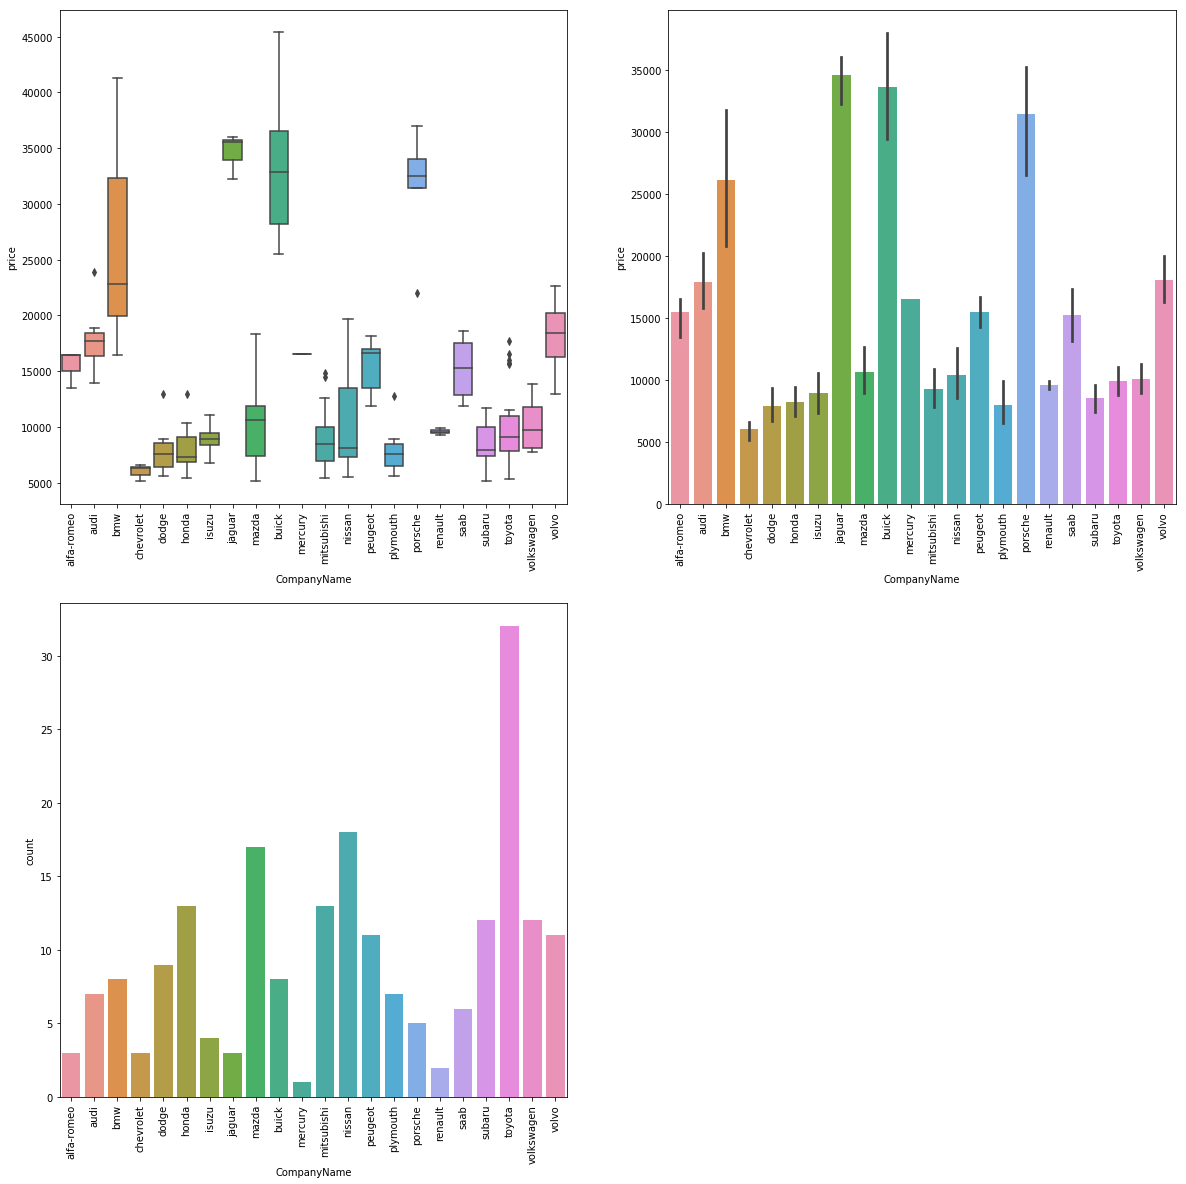

In [69]:
plt.figure(figsize=(20, 20))
plt.subplot(2,2,1)
sns.boxplot(x = 'CompanyName', y = 'price', data = cardf)
plt.xticks(rotation = 90)

plt.subplot(2,2,2)
sns.barplot(x = 'CompanyName', y = 'price', data = cardf)
plt.xticks(rotation = 90)

plt.subplot(2,2,3)
sns.countplot('CompanyName', data = cardf)
plt.xticks(rotation = 90)

- buick, jaguar , bmw and porsche are costliest cars. These are luxuary cars
- Toyota has highest number of sales
- mercury has least Sales

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

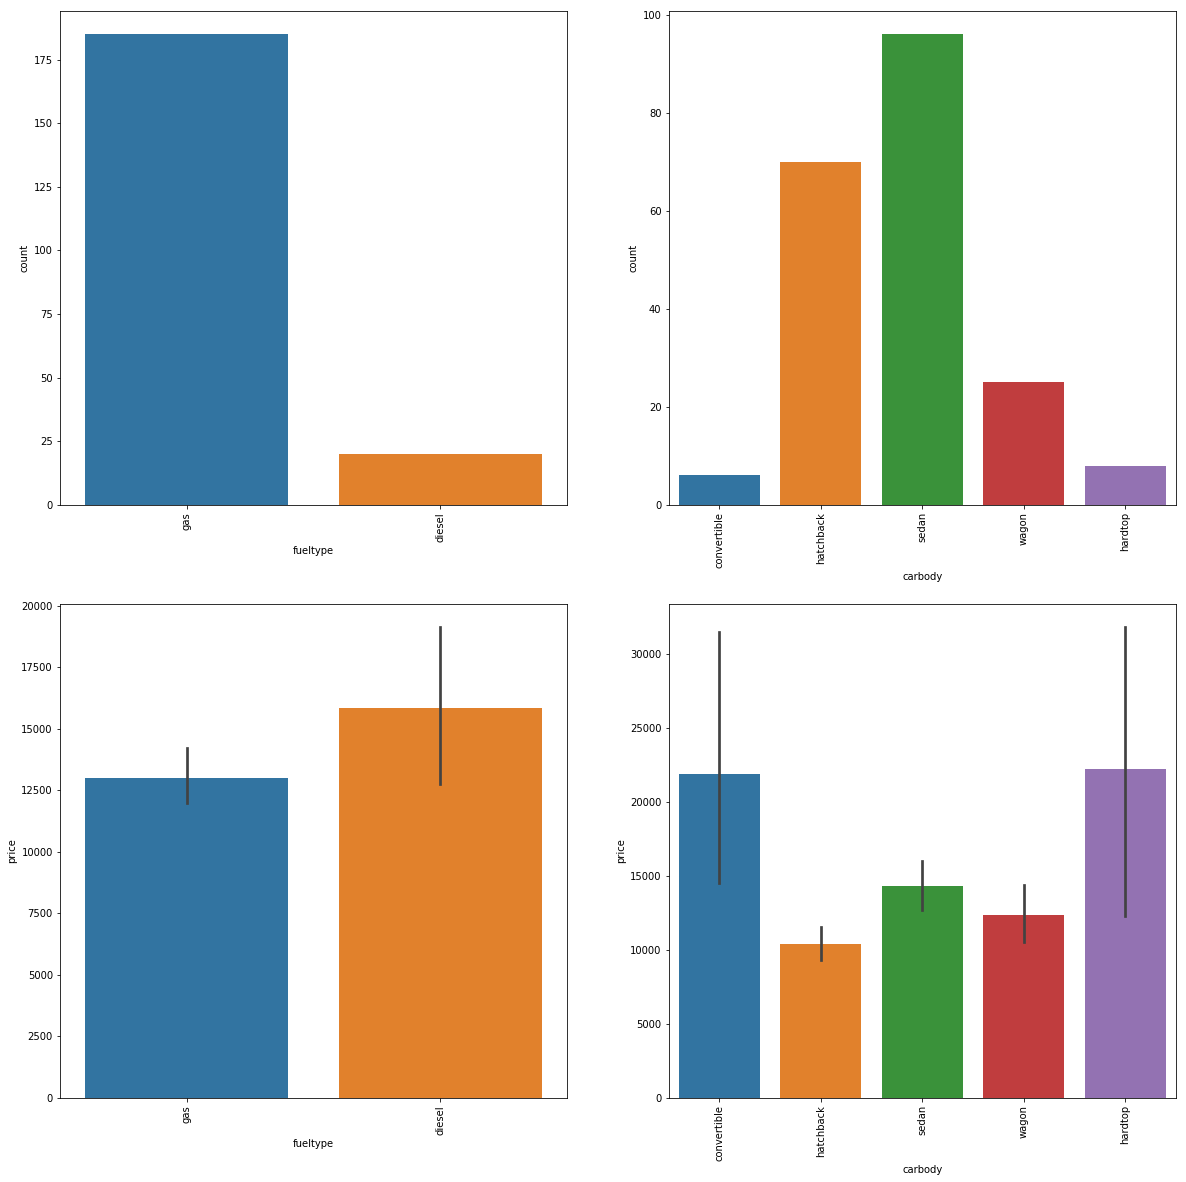

In [70]:
plt.figure(figsize=(20, 20))
plt.subplot(2,2,1)
sns.countplot('fueltype', data = cardf)
plt.xticks(rotation = 90)

plt.subplot(2,2,2)
sns.countplot('carbody', data = cardf)
plt.xticks(rotation = 90)

plt.subplot(2,2,3)
sns.barplot(x='fueltype',y='price', data = cardf)
plt.xticks(rotation = 90)

plt.subplot(2,2,4)
sns.barplot(x='carbody',y='price', data = cardf)
plt.xticks(rotation = 90)

**Insights**
- Gas Cars has more Sales then deisel cars.
- Deisel Cars costlier than Gas cars
- Sedan and hatchback type cars has more sales
- covertible and hardtop cars are costlier

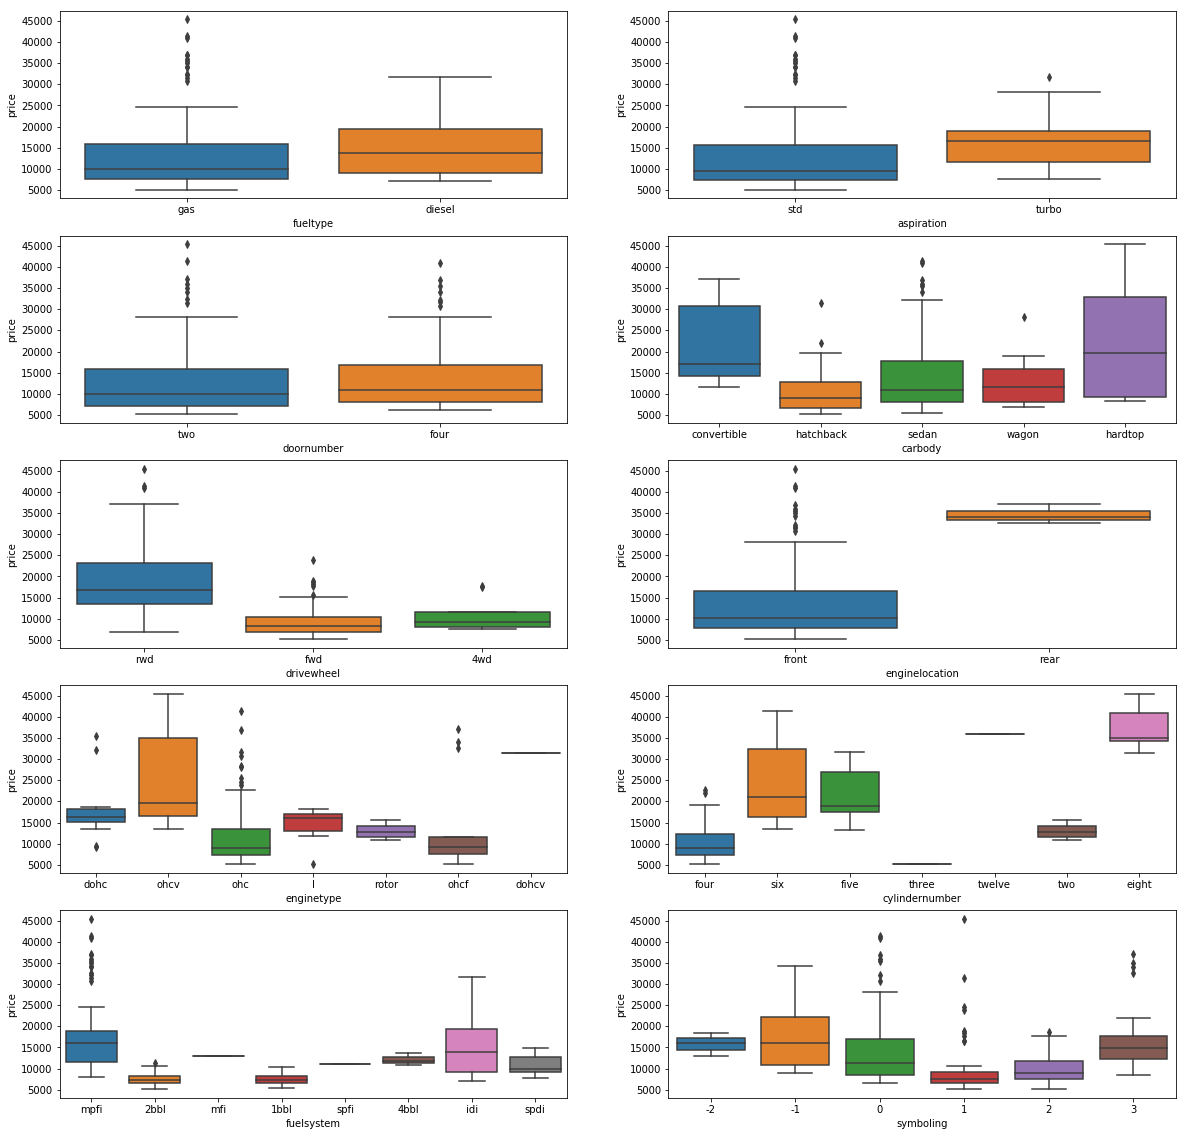

In [71]:
plt.figure(figsize=(20, 20))

plt.subplot(5,2,1)
sns.boxplot(x = 'fueltype', y = 'price', data = cardf)

plt.subplot(5,2,2)
sns.boxplot(x = 'aspiration', y = 'price', data = cardf)

plt.subplot(5,2,3)
sns.boxplot(x = 'doornumber', y = 'price', data = cardf)

plt.subplot(5,2,4)
sns.boxplot(x = 'carbody', y = 'price', data = cardf)

plt.subplot(5,2,5)
sns.boxplot(x = 'drivewheel', y = 'price', data = cardf)

plt.subplot(5,2,6)
sns.boxplot(x = 'enginelocation', y = 'price', data = cardf)

plt.subplot(5,2,7)
sns.boxplot(x = 'enginetype', y = 'price', data = cardf)

plt.subplot(5,2,8)
sns.boxplot(x = 'cylindernumber', y = 'price', data = cardf)

plt.subplot(5,2,9)
sns.boxplot(x = 'fuelsystem', y = 'price', data = cardf)


plt.subplot(5,2,10)
sns.boxplot(x = 'symboling', y = 'price', data = cardf)
# plt.show()

- Cars with aspiration as "turbo" as more priced
- Doornumber is not having significant impact on price
- Drivewheel "rwd" is more priced
- rear enginelocation are very costly than fromt enginelocation
- engine type ohcv is more priced
- cars with 8 cyclinders are more priced
- car with mpfi fuelsystem is more priced
- Cars associated with -1 (risky) is more priced but have more price variation. However symboling 3 is safest car has less variance in price.

In [72]:
# drop carID and Car Name as these variables are not required

cardf.drop(['car_ID','CarName'],axis=1,inplace=True)

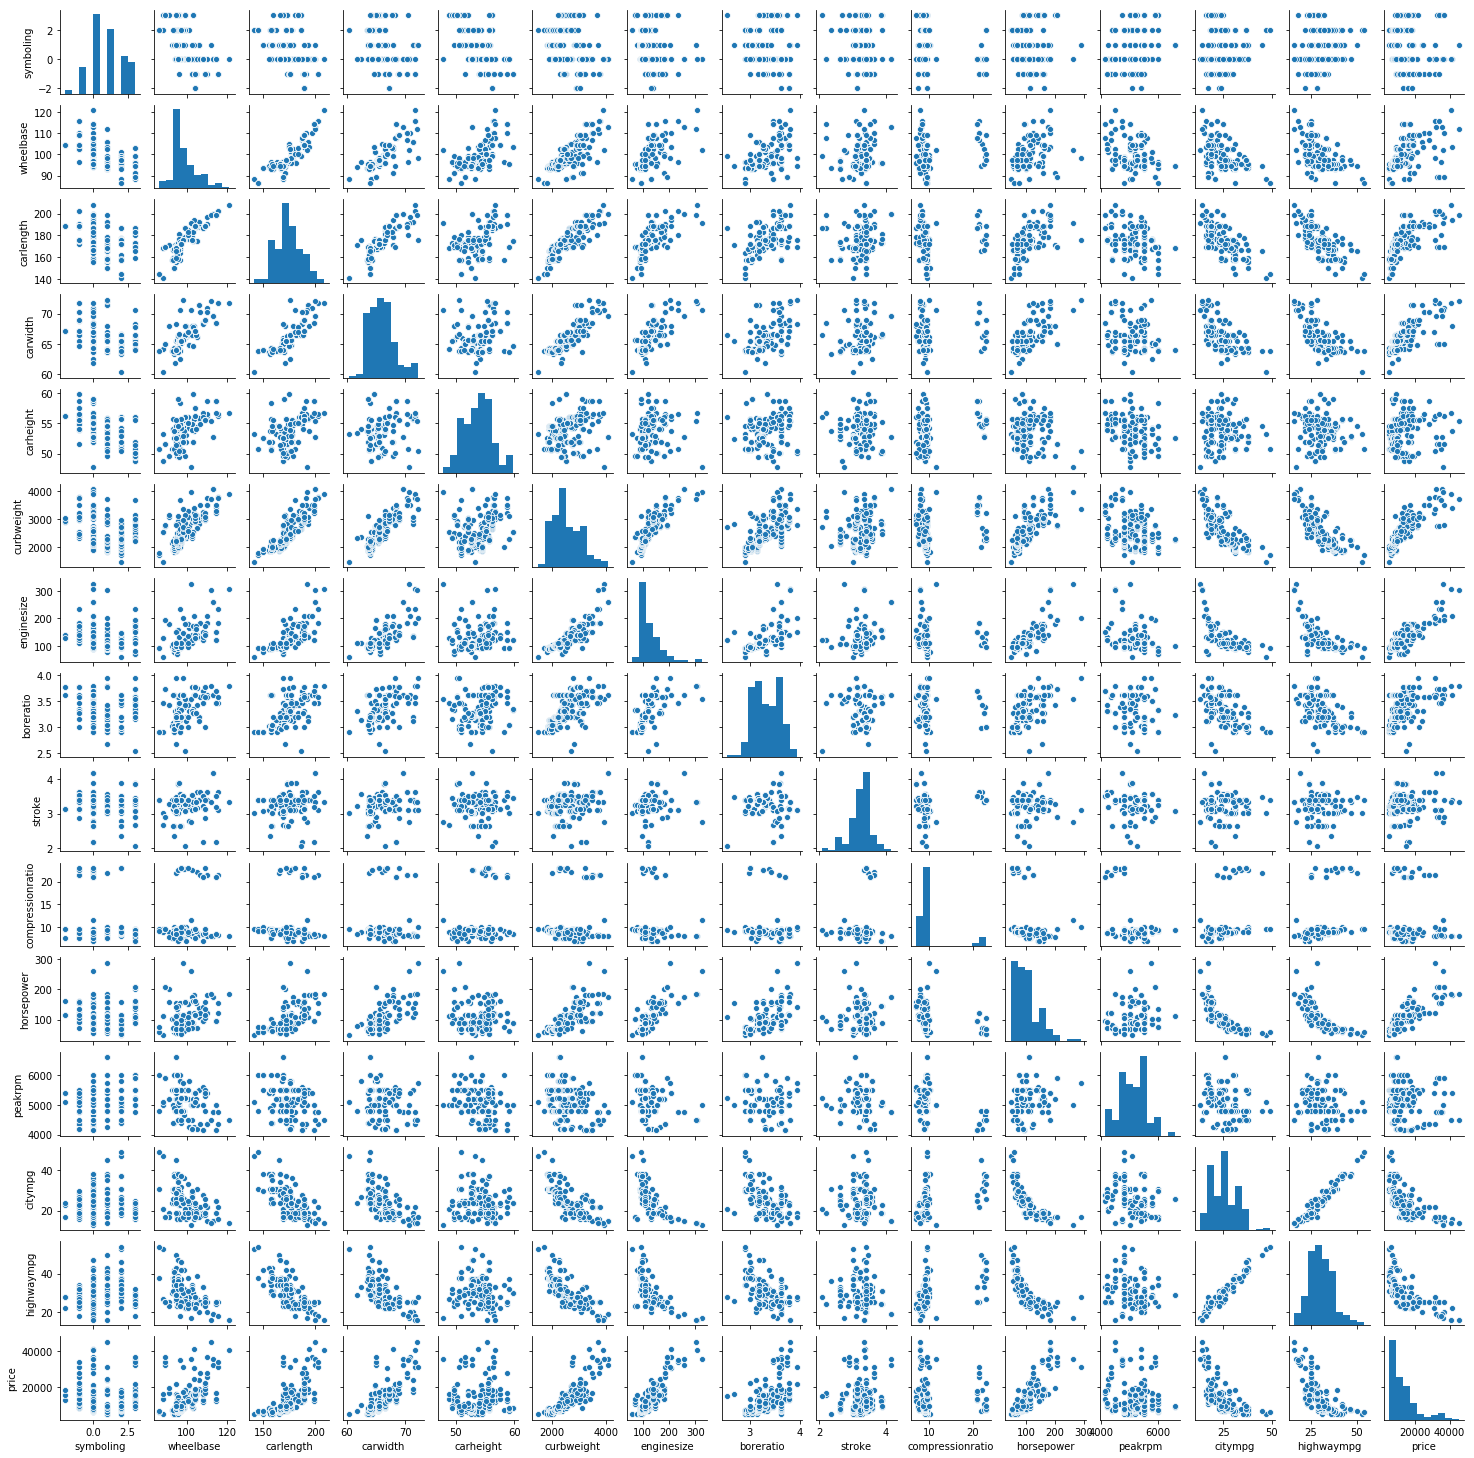

In [73]:
# Check the correlation between all numeric variables using pair plot

# sns.set(font_scale=2)
ax = sns.pairplot(cardf)
ax.fig.set_size_inches(20,20)

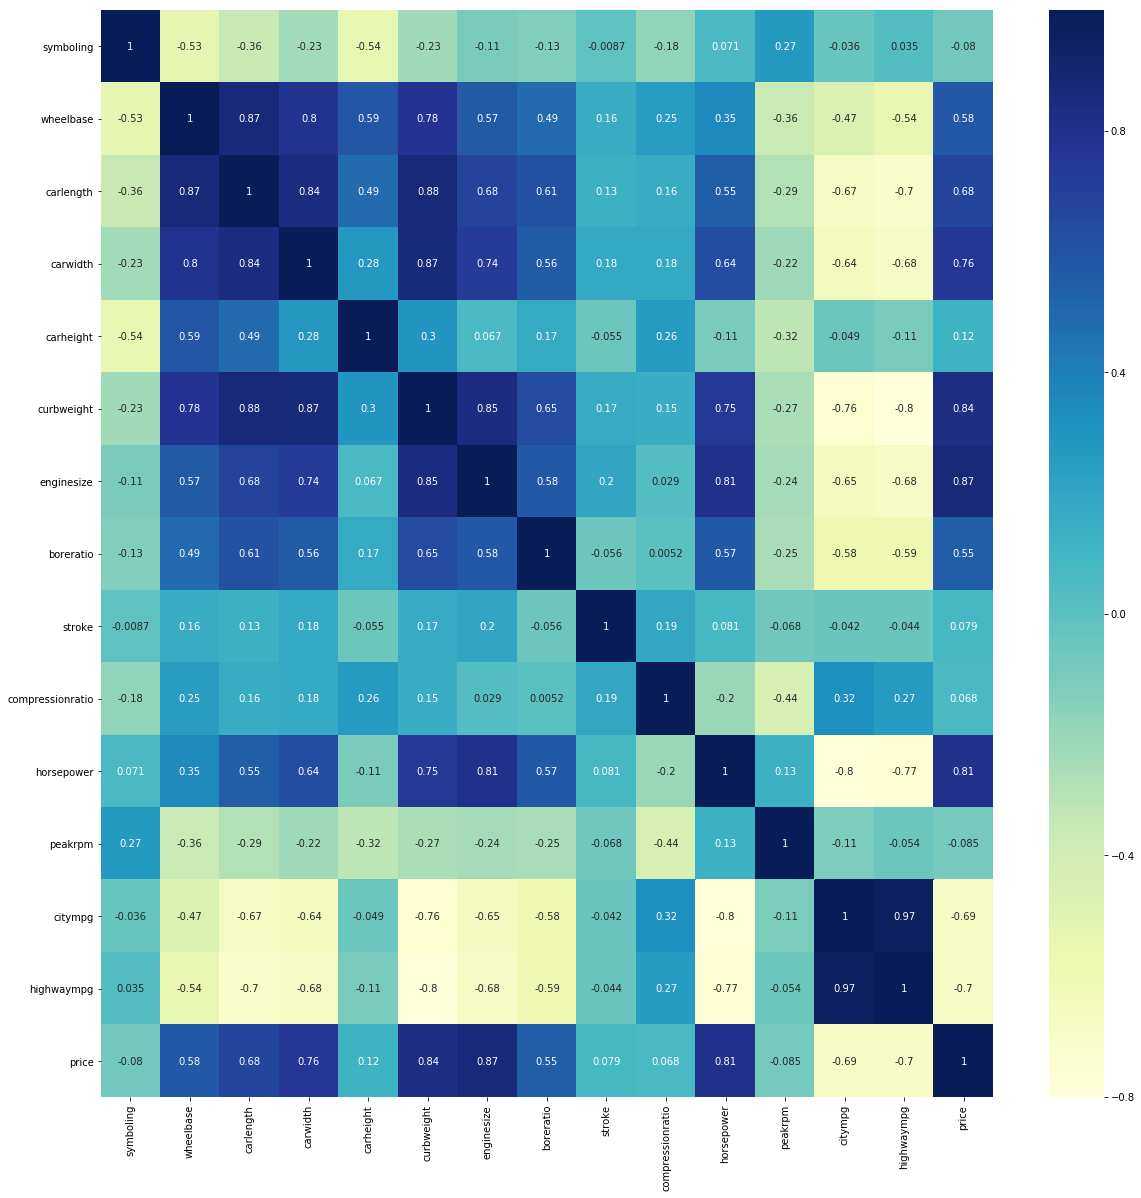

In [74]:
fig =plt.figure(figsize=(20,20))
sns.heatmap(cardf.corr(), cmap="YlGnBu", annot = True)

**Insights** : 
- Price has high +ve correlation with carlength, carwidth,curbweight,enginesize,and horsepower
- Price has -ve correlation with symboling,citympg,highwaympg
- citympg and highwaympg are highly correlated variables
- horespower has high +ve correlation with curbweight and enginesize and decent correlation with carlength and carweight
- carlength, carwidth and wheelbase are highly +ve correlated
- citympg and highwaympg has -ve correlation with wheelbase, carlength, carwidth, curbweight, enginesize, horespower and boreratio


**Top 5 variables which impacts Price based on EDA**
- CompanyName
- Engine Location
- cylindernumber
- enginesize
- citympg

## Step 3: Data Preparation

- Encode all categorical variable to numeric values using One Hot Encoder
- doornumber and cylindernumber has numbers as string. These can be converted directly
- enginelocation, aspiration and fueltype has only 2 values. Hence they can be encoded with binary value 0,1

In [75]:
# Map Cylindernumber and doornumber to numeric variables

cardf['doornumber'] = cardf.doornumber.apply(lambda x : 4 if (x =='four') else 2)

In [76]:
cardf['cylindernumber'] = cardf.cylindernumber.map({'two':2,'three':3,'four':4,'five':5,'six':6,'eight':8,'twelve':12})

In [77]:
# Binary encoding
cardf['enginelocation'] = cardf.enginelocation.map({'front':0,'rear':1})
cardf['aspiration'] = cardf.aspiration.map({'std':0,'turbo':1})
cardf['fueltype'] = cardf.fueltype.map({'gas':0,'diesel':1})

In [78]:
# Lets encode other categorical variables using OneHotEncoder

company_en = pd.get_dummies(cardf['CompanyName'], drop_first = True)
carbody_en = pd.get_dummies(cardf['carbody'], drop_first = True)
drivewheel_en = pd.get_dummies(cardf['drivewheel'], drop_first = True)
entype_en = pd.get_dummies(cardf['enginetype'], drop_first = True)
fuelsys_en = pd.get_dummies(cardf['fuelsystem'], drop_first = True)

cardf = pd.concat([cardf,company_en,carbody_en,drivewheel_en,entype_en,fuelsys_en],axis=1)

cardf.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,3,0,0,2,convertible,rwd,0,88.6,168.8,64.1,...,0,0,0,0,0,0,0,1,0,0
1,3,0,0,2,convertible,rwd,0,88.6,168.8,64.1,...,0,0,0,0,0,0,0,1,0,0
2,1,0,0,2,hatchback,rwd,0,94.5,171.2,65.5,...,0,1,0,0,0,0,0,1,0,0
3,2,0,0,4,sedan,fwd,0,99.8,176.6,66.2,...,0,0,0,0,0,0,0,1,0,0
4,2,0,0,4,sedan,4wd,0,99.4,176.6,66.4,...,0,0,0,0,0,0,0,1,0,0


In [79]:
# Drop already encoding categorical variables

cardf = cardf.drop(['CompanyName','carbody','drivewheel','enginetype','fuelsystem'],axis=1)
cardf.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,3,0,0,2,0,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,1,0,0
1,3,0,0,2,0,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,1,0,0
2,1,0,0,2,0,94.5,171.2,65.5,52.4,2823,...,0,1,0,0,0,0,0,1,0,0
3,2,0,0,4,0,99.8,176.6,66.2,54.3,2337,...,0,0,0,0,0,0,0,1,0,0
4,2,0,0,4,0,99.4,176.6,66.4,54.3,2824,...,0,0,0,0,0,0,0,1,0,0


In [80]:

cardf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 60 columns):
symboling           205 non-null int64
fueltype            205 non-null int64
aspiration          205 non-null int64
doornumber          205 non-null int64
enginelocation      205 non-null int64
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
cylindernumber      205 non-null int64
enginesize          205 non-null int64
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg             205 non-null int64
highwaympg          205 non-null int64
price               205 non-null float64
audi                205 non-null uint8
bmw                 205 non-null uint8
buick               2

Now all variables are converted into numeric

##  Splitting the Data into Training and Testing Sets

In [81]:
# Split cars dataframe to test and train dfs

np.random.seed(0)
df_train, df_test = train_test_split(cardf, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features using MixMax Scaler

- As there are many categorical variables with 0 and 1 value and also numeric variables with high values, We need to scale them. 

- We are using MixMaxScaler for this

In [82]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

scaler = MinMaxScaler()



# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

num_vars = ['symboling', 'doornumber', 
       'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'cylindernumber', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])


In [83]:
df_train.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
122,0.6,0,0,1.0,0,0.244828,0.426016,0.291667,0.265487,0.272692,...,0,0,0,1,0,0,0,0,0,0
125,1.0,0,0,0.0,0,0.272414,0.452033,0.666667,0.212389,0.500388,...,0,0,0,0,0,0,0,1,0,0
166,0.6,0,0,0.0,0,0.272414,0.448780,0.308333,0.424779,0.314973,...,0,0,0,0,0,0,0,1,0,0
1,1.0,0,0,0.0,0,0.068966,0.450407,0.316667,0.088496,0.411171,...,0,0,0,0,0,0,0,1,0,0
199,0.2,0,1,1.0,0,0.610345,0.775610,0.575000,0.858407,0.647401,...,0,0,0,0,0,0,0,1,0,0


In [84]:
df_train.describe()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.0
mean,0.559441,0.090909,0.181818,0.559441,0.006993,0.411141,0.525476,0.461655,0.509004,0.407878,...,0.083916,0.062937,0.027972,0.349650,0.020979,0.090909,0.0,0.440559,0.041958,0.0
std,0.239200,0.288490,0.387050,0.498199,0.083624,0.205581,0.204848,0.184517,0.215378,0.211269,...,0.278236,0.243703,0.165472,0.478536,0.143818,0.288490,0.0,0.498199,0.201198,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
25%,0.400000,0.000000,0.000000,0.000000,0.000000,0.272414,0.399187,0.304167,0.353982,0.245539,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
50%,0.600000,0.000000,0.000000,1.000000,0.000000,0.341379,0.502439,0.425000,0.522124,0.355702,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
75%,0.600000,0.000000,0.000000,1.000000,0.000000,0.503448,0.669919,0.550000,0.668142,0.559542,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0


## Building a linear model

### Dividing into X and Y sets for the model building

In [85]:
y_train = df_train.pop('price')
X_train = df_train

### RFE
We will use Recursive feature elimination to select top 10 features which impact Price as there are total 60 features 

In [86]:
# Use RFE to check what all variables are needed for modelling

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [87]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)             

# running RFE
rfe = rfe.fit(X_train, y_train)

In [88]:
# Check ranking of the columns
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 42),
 ('fueltype', False, 13),
 ('aspiration', False, 10),
 ('doornumber', False, 40),
 ('enginelocation', True, 1),
 ('wheelbase', False, 18),
 ('carlength', False, 19),
 ('carwidth', True, 1),
 ('carheight', False, 15),
 ('curbweight', True, 1),
 ('cylindernumber', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', False, 5),
 ('horsepower', False, 8),
 ('peakrpm', False, 6),
 ('citympg', False, 33),
 ('highwaympg', False, 21),
 ('audi', False, 43),
 ('bmw', True, 1),
 ('buick', False, 12),
 ('chevrolet', False, 22),
 ('dodge', False, 17),
 ('honda', False, 20),
 ('isuzu', False, 34),
 ('jaguar', False, 44),
 ('mazda', False, 39),
 ('mercury', False, 46),
 ('mitsubishi', False, 11),
 ('nissan', False, 35),
 ('peugeot', True, 1),
 ('plymouth', False, 16),
 ('porsche', False, 3),
 ('renault', False, 32),
 ('saab', False, 9),
 ('subaru', False, 29),
 ('toyota', False, 38),
 ('volkswagen', False, 36),
 ('volvo', 

In [89]:
# Check top 10 selected columns
col = X_train.columns[rfe.support_]
col

Index(['enginelocation', 'carwidth', 'curbweight', 'cylindernumber',
       'enginesize', 'boreratio', 'stroke', 'bmw', 'peugeot', 'dohcv'],
      dtype='object')

In [91]:
# Check other columns which we will be removing from model
X_train.columns[~rfe.support_]

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'wheelbase',
       'carlength', 'carheight', 'compressionratio', 'horsepower', 'peakrpm',
       'citympg', 'highwaympg', 'audi', 'buick', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercury', 'mitsubishi', 'nissan',
       'plymouth', 'porsche', 'renault', 'saab', 'subaru', 'toyota',
       'volkswagen', 'volvo', 'hardtop', 'hatchback', 'sedan', 'wagon', 'fwd',
       'rwd', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor', '2bbl', '4bbl', 'idi',
       'mfi', 'mpfi', 'spdi', 'spfi'],
      dtype='object')

In [92]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

#### Model 1

In [93]:
# Build Model using Top 10 features selected by RFE

X_train_rfe = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr_1 = sm.OLS(y_train, X_train_rfe).fit()

print(lr_1.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     157.9
Date:                Sun, 05 Apr 2020   Prob (F-statistic):           2.47e-68
Time:                        23:05:52   Log-Likelihood:                 200.12
No. Observations:                 143   AIC:                            -378.2
Df Residuals:                     132   BIC:                            -345.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1974      0.067      2.

- With all columns we got pretty good model with Adjusted R-squared as 91.7. 
- Also We will have look at VIF to see multicollinearlity as we have lot of highly correlated variables

### Checking VIF

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [94]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [95]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,168.35
5,enginesize,42.72
4,cylindernumber,21.94
3,curbweight,10.52
6,boreratio,7.50
2,carwidth,5.18
7,stroke,3.71
10,dohcv,1.60
9,peugeot,1.35
1,enginelocation,1.13


 - From Model has all variables having less p-value and good rsquared. 
 - But VIFs of few variables are high as we have high multicollineraity
 - enginesize has highest VIFs. But instead of dropping enginesize, we will drop curbweight which is also highly collinear with enginesize. Also enginesize has more correlation value (0.87) with Price than curbweight(0.81).
 - Hence we choose to drop curbweight first , to remove multicollinearity from the model

In [96]:

X_train_rfe = X_train_rfe.drop('curbweight',axis=1)



#### Model 2

In [97]:
# Build a second fitted model
X_train_rfe = sm.add_constant(X_train_rfe)

lr_2 = sm.OLS(y_train, X_train_rfe).fit()

# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     158.3
Date:                Sun, 05 Apr 2020   Prob (F-statistic):           1.49e-66
Time:                        23:12:50   Log-Likelihood:                 192.87
No. Observations:                 143   AIC:                            -365.7
Df Residuals:                     133   BIC:                            -336.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2725      0.067      4.

In [98]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,153.55
4,enginesize,29.59
3,cylindernumber,19.04
5,boreratio,7.16
6,stroke,3.41
2,carwidth,3.25
9,dohcv,1.60
8,peugeot,1.23
1,enginelocation,1.11
7,bmw,1.10


- Lets drop cylindernumber first to remove mutlicollinearity as enginesize has strong correlation with Price

In [99]:

X_train_rfe = X_train_rfe.drop('cylindernumber',axis=1)


### Model 3

In [100]:
# Build a 3rd fitted model
X_train_rfe = sm.add_constant(X_train_rfe)

lr_3 = sm.OLS(y_train, X_train_rfe).fit()

# Print the summary of the model
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     127.6
Date:                Sun, 05 Apr 2020   Prob (F-statistic):           8.02e-59
Time:                        23:15:48   Log-Likelihood:                 170.96
No. Observations:                 143   AIC:                            -323.9
Df Residuals:                     134   BIC:                            -297.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1545      0.031     -4.

- We see some of the variables are having high p-value. Hence lets drop variable having highest P-value which is "dohcv"

In [102]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,24.68
2,carwidth,3.25
3,enginesize,3.01
4,boreratio,1.95
5,stroke,1.28
7,peugeot,1.20
1,enginelocation,1.11
6,bmw,1.10
8,dohcv,1.10


In [103]:

X_train_rfe = X_train_rfe.drop('dohcv',axis=1)


#### Model 4

In [104]:
# Build a 4th fitted model
X_train_rfe = sm.add_constant(X_train_rfe)

lr_4 = sm.OLS(y_train, X_train_rfe).fit()

# Print the summary of the model
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     146.7
Date:                Sun, 05 Apr 2020   Prob (F-statistic):           7.06e-60
Time:                        23:18:39   Log-Likelihood:                 170.85
No. Observations:                 143   AIC:                            -325.7
Df Residuals:                     135   BIC:                            -302.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1560      0.031     -5.

 - Next "boreratio" is having highest P-value which is above 0.05. Lets drop that as well

In [105]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,24.41
2,carwidth,3.14
3,enginesize,3.00
4,boreratio,1.94
5,stroke,1.27
7,peugeot,1.18
1,enginelocation,1.11
6,bmw,1.10


In [106]:

X_train_rfe = X_train_rfe.drop('boreratio',axis=1)


# X_train_rfe = X_train_rfe.drop('l',axis=1)

#### Model 5

In [107]:
# Build a 5th fitted model
X_train_rfe = sm.add_constant(X_train_rfe)

lr_5 = sm.OLS(y_train, X_train_rfe).fit()

# Print the summary of the model
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     170.8
Date:                Sun, 05 Apr 2020   Prob (F-statistic):           8.95e-61
Time:                        23:20:35   Log-Likelihood:                 170.26
No. Observations:                 143   AIC:                            -326.5
Df Residuals:                     136   BIC:                            -305.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1740      0.026     -6.

- Now "stroke" is having high p-value. Lets drop it

In [108]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,17.04
2,carwidth,2.84
3,enginesize,2.84
6,peugeot,1.15
1,enginelocation,1.10
5,bmw,1.10
4,stroke,1.09


In [109]:
X_train_rfe = X_train_rfe.drop('stroke',axis=1)

#### Model 6

In [110]:
# Build a 6th fitted model
X_train_rfe = sm.add_constant(X_train_rfe)

lr_6 = sm.OLS(y_train, X_train_rfe).fit()

# Print the summary of the model
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     204.1
Date:                Sun, 05 Apr 2020   Prob (F-statistic):           1.17e-61
Time:                        23:24:42   Log-Likelihood:                 169.55
No. Observations:                 143   AIC:                            -327.1
Df Residuals:                     137   BIC:                            -309.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1962      0.018    -10.

In [111]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,8.05
2,carwidth,2.82
3,enginesize,2.80
5,peugeot,1.14
4,bmw,1.09
1,enginelocation,1.08


**Now all p-values and VIFs are within range.** 
  - Adjusted R-squared value is 88% , which is good.
  - Prob(F-statistic) is pretty low, which tells overall model is good.
  
  **We will go with above Model** 

## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [112]:
y_train_price = lr_6.predict(X_train_rfe)

Text(0.5, 0, 'Errors')

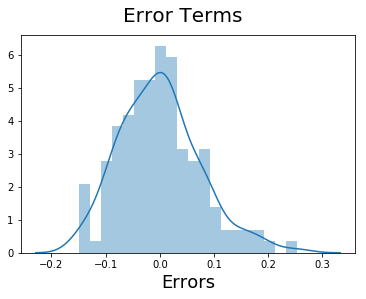

In [113]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

Error Terms are Normally distributed with mean 0. So we are good

## Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. **Model 6**.

In [114]:

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [115]:
df_test.describe()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.000000,62.000000,62.0,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.000000
mean,0.583871,0.112903,0.177419,0.564516,0.032258,0.437764,0.559481,0.480376,0.559663,0.428470,...,0.048387,0.064516,0.0,0.258065,0.0,0.112903,0.016129,0.500000,0.048387,0.016129
std,0.271724,0.319058,0.385142,0.499868,0.178127,0.212861,0.189947,0.165440,0.215811,0.179488,...,0.216335,0.247676,0.0,0.441142,0.0,0.319058,0.127000,0.504082,0.216335,0.127000
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.056911,0.183333,0.141593,0.128394,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.000000,0.000000,0.000000,0.000000,0.313793,0.459350,0.358333,0.384956,0.305275,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.600000,0.000000,0.000000,1.000000,0.000000,0.387931,0.547967,0.441667,0.588496,0.406129,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.500000,0.000000,0.000000
75%,0.800000,0.000000,0.000000,1.000000,0.000000,0.570690,0.719919,0.516667,0.699115,0.564876,...,0.000000,0.000000,0.0,0.750000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.182759,1.089431,0.975000,1.061947,0.935609,...,1.000000,1.000000,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [116]:
y_test = df_test.pop('price')
X_test = df_test

In [117]:
# Adding constant variable to test dataframe
X_test_m6 = sm.add_constant(X_test)

In [118]:
# Creating X_test_new dataframe by dropping variables from X_test_m6
X_test_new = X_test_m6[X_train_rfe.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [119]:
# Making predictions
y_pred = lr_6.predict(X_test_new)

## Model Evaluation

Text(0, 0.5, 'y_pred')

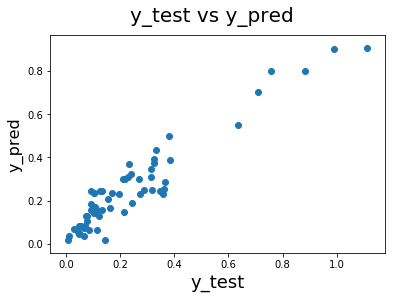

In [120]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

**Check R squared and MSE**

In [125]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)


In [126]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.005672621617287295
r_square_value : 0.8938669980549843


R Squared Value is increased to 89 from 87 which is within range (+/- 5%). Hence we are good with our Model 

Text(0, 0.5, 'Price')

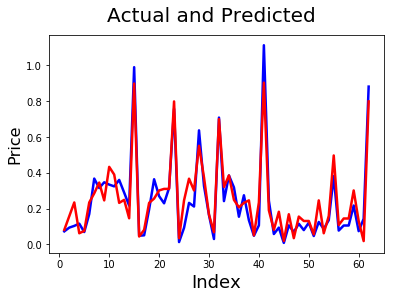

In [128]:
#Actual vs Predicted
c = [i for i in range(1,63,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Price', fontsize=16)                               # Y-label

Model is catching all spikes and falls. Hence looks good

Text(0, 0.5, 'y_test-y_pred')

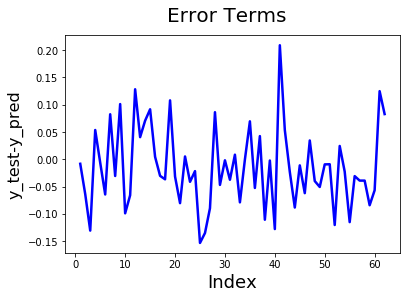

In [129]:
# Error terms
c = [i for i in range(1,63,1)]
fig = plt.figure()
plt.plot(c,y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('y_test-y_pred', fontsize=16)                # Y-label

All Resiudal are within range. Hence **Model 6** is overall good model with 89% r2-score.

We can see that the equation of our best fitted line is:

$ price = 0.4733  \times  enginelocation + 0.5662  \times  carwidth + 0.5974 \times enginesize + 0.2511 \times bmw + -0.0706 \times peugeot -0.1962$
